In [1]:
import numpy as np
import pandas as pd
import time
import csv

# Dataset

### DATA IMPORT

In [2]:
train = pd.read_csv('train.csv', index_col='ID')
test = pd.read_csv('test.csv', index_col='ID')

In [3]:
train

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,4.4,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,2.9,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459


In [4]:
test

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
ID,,,,,,,,,,,,,,,,,,,,,
TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,2.4,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,2.4,...,70.567966,70.528762,70.333905,70.245126,70.186665,70.010219,69.916747,69.771722,69.737748,69.601365
TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,3.9,...,66.545938,66.485657,66.408375,66.255137,66.206650,66.079592,65.951010,65.884988,65.719787,65.632342
TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,3.7,...,63.254101,63.134023,63.035379,62.877995,62.681351,62.499735,62.421901,62.417195,62.323963,62.307955


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, TRAIN_0000 to TRAIN_2206
Columns: 183 entries, 착과량(int) to 2022-11-28 엽록소
dtypes: float64(182), int64(1)
memory usage: 3.1+ MB


In [6]:
train.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, TEST_0000 to TEST_2207
Columns: 182 entries, 수고(m) to 2022-11-28 엽록소
dtypes: float64(182)
memory usage: 3.1+ MB


### RENAME COLUMNS

In [25]:
cols = ['착과량(int)','수고','수관폭min','수관폭max','수관폭avg']
for i in range(89):
    cols.append('s{}'.format(i))
for i in range(89):
    cols.append('c{}'.format(i))
len(cols)

183

In [26]:
train.columns=cols
test.columns=cols[1:]
print(train.columns)
print(test.columns)

Index(['착과량(int)', '수고', '수관폭min', '수관폭max', '수관폭avg', 's0', 's1', 's2', 's3',
       's4',
       ...
       'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88'],
      dtype='object', length=183)
Index(['수고', '수관폭min', '수관폭max', '수관폭avg', 's0', 's1', 's2', 's3', 's4', 's5',
       ...
       'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88'],
      dtype='object', length=182)


# EDA

In [20]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
import seaborn as sns
from datetime import datetime 

### 착과량(target)

-0.019181543802712243


<Figure size 200x200 with 0 Axes>

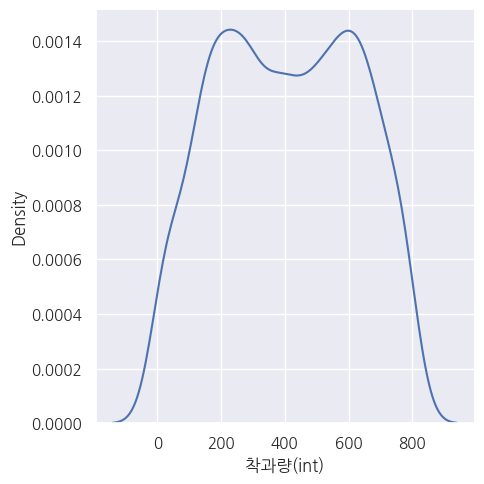

In [27]:
# 착과량 분포
print(train['착과량(int)'].skew())
plt.figure(figsize = (2,2))
sns.displot(data=train, x='착과량(int)', kind="kde")
plt.show()

In [28]:
train['착과량(int)'].kurt()

-1.1199286333271075

In [29]:
train['착과량(int)'].describe()

count    2207.000000
mean      406.222474
std       218.978302
min         1.000000
25%       221.000000
50%       404.000000
75%       593.500000
max       799.000000
Name: 착과량(int), dtype: float64

In [30]:
train['착과량(int)'].describe()['25%']

221.0

In [31]:
q1 = train[train['착과량(int)'] < train['착과량(int)'].describe()['25%']]
q3 = train[train['착과량(int)'] > train['착과량(int)'].describe()['75%']]
q2 = train.loc[list(set(train.index)-set(q3.index)-set(q1.index))]

### 새순, 엽록소 나눠서 보자 (chlorophyll, sprout)

In [32]:
chlorophyll_col = ['c'+ str(i) for i in range(89)]
sprout_col = ['s'+ str(i) for i in range(89)]
col_else = train.columns[:4]

### chlorophyll: 분위별 경향성 잘 안보임

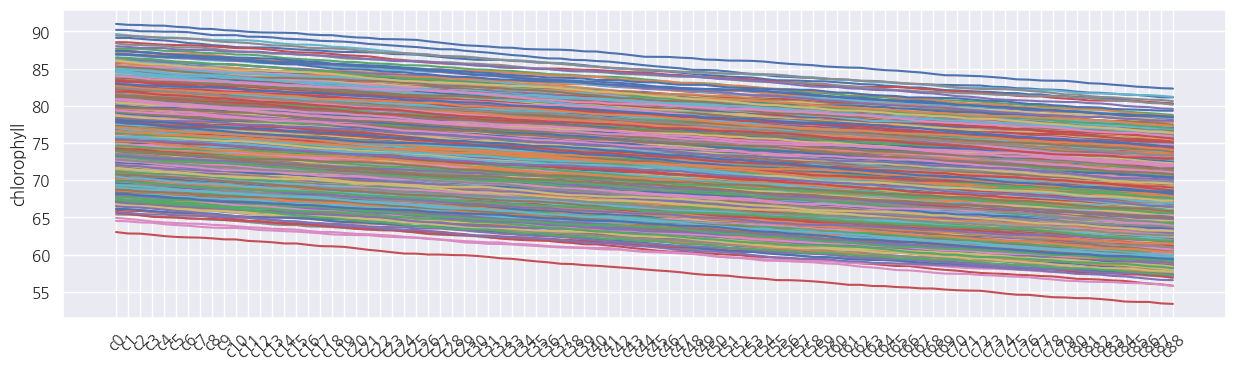

In [33]:
plt.figure(figsize=(15, 4))
for i in train[chlorophyll_col].index:
    sns.lineplot(data=train[chlorophyll_col].loc[i])
plt.ylabel('chlorophyll')
plt.xticks(rotation=45)
plt.show()

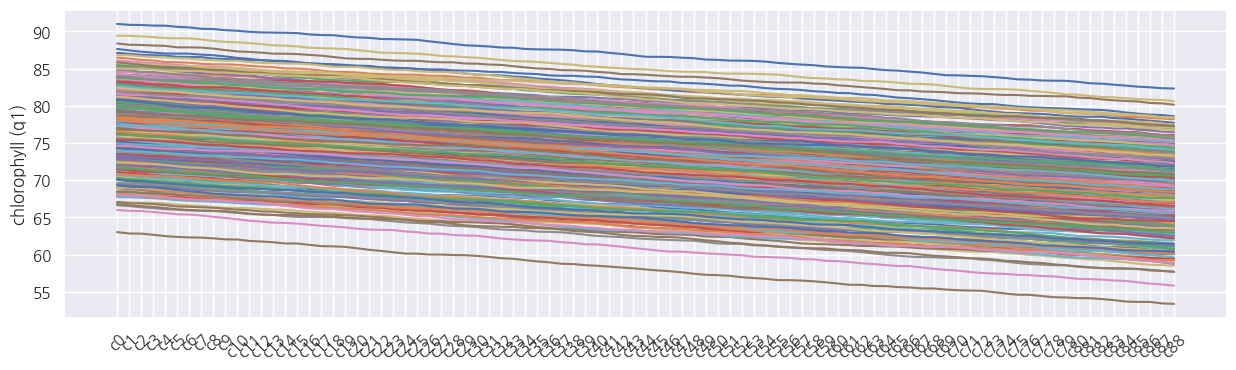

In [34]:
plt.figure(figsize=(15, 4))
for i in q1.index:
    sns.lineplot(data=train[chlorophyll_col].loc[i])
plt.ylabel('chlorophyll (q1)')
plt.xticks(rotation=45)
plt.show()

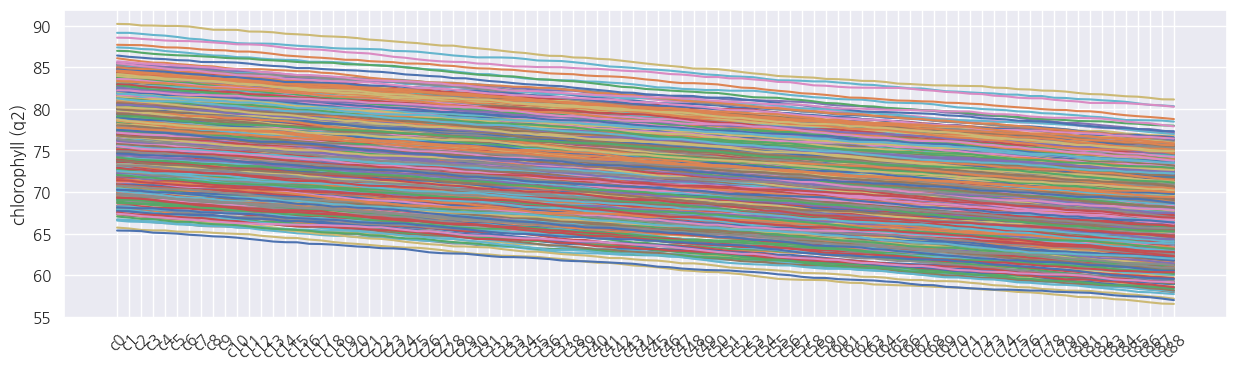

In [35]:
plt.figure(figsize=(15, 4))
for i in q2.index:
    sns.lineplot(data=train[chlorophyll_col].loc[i])
plt.ylabel('chlorophyll (q2)')
plt.xticks(rotation=45)
plt.show()

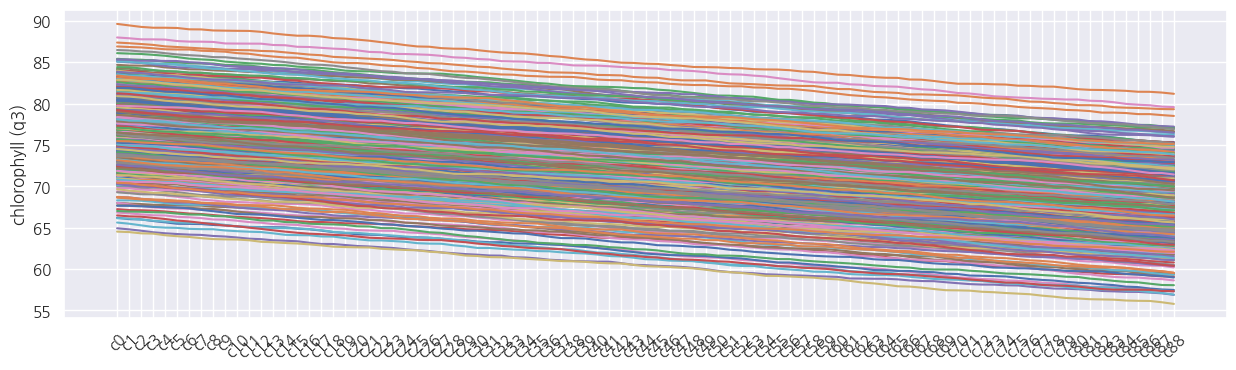

In [36]:
plt.figure(figsize=(15, 4))
for i in q3.index:
    sns.lineplot(data=train[chlorophyll_col].loc[i])
plt.ylabel('chlorophyll (q3)')
plt.xticks(rotation=45)
plt.show()

### sprout: 분위별 경향성 존재 (target 값 높은 군일수록 sprout 낮음)

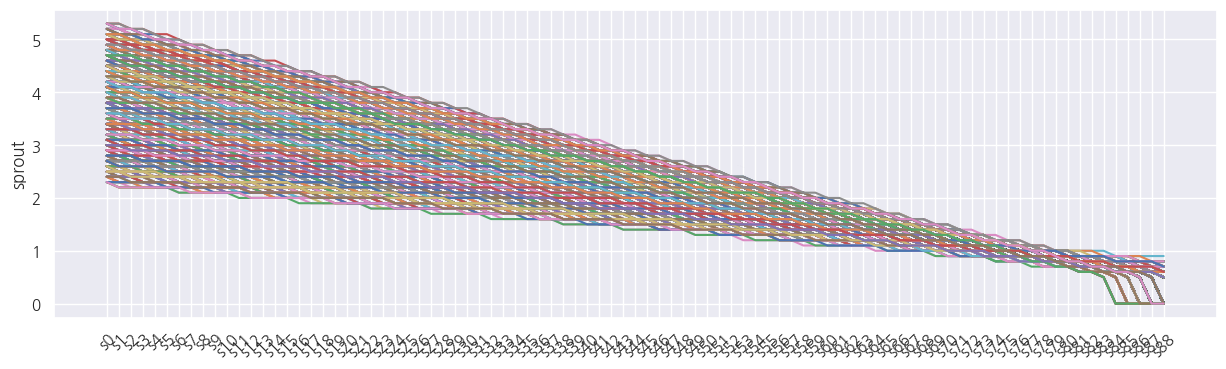

In [40]:
plt.figure(figsize=(15, 4))
for i in train[sprout_col].index:
    sns.lineplot(data=train[sprout_col].loc[i])
plt.ylabel('sprout')
plt.xticks(rotation=45)
plt.show()

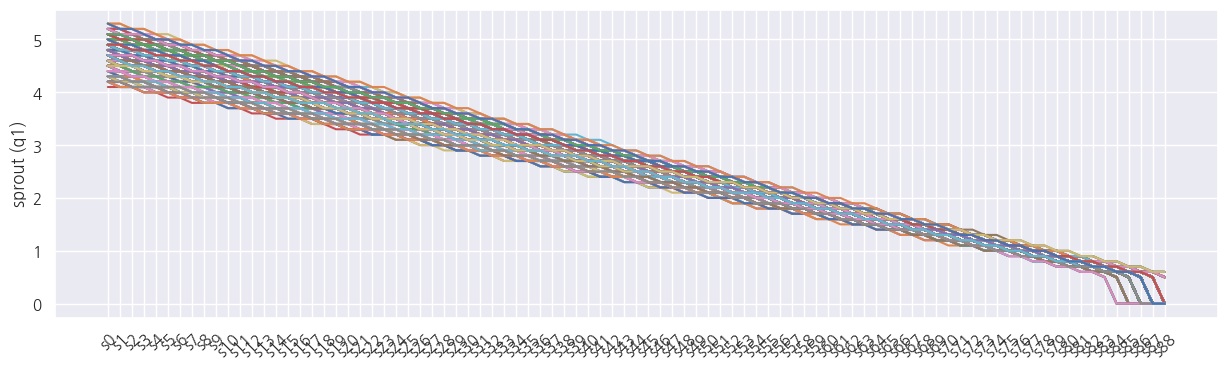

In [41]:
plt.figure(figsize=(15, 4))
for i in q1.index:
    sns.lineplot(data=train[sprout_col].loc[i])
plt.ylabel('sprout (q1)')
plt.xticks(rotation=45)
plt.show()

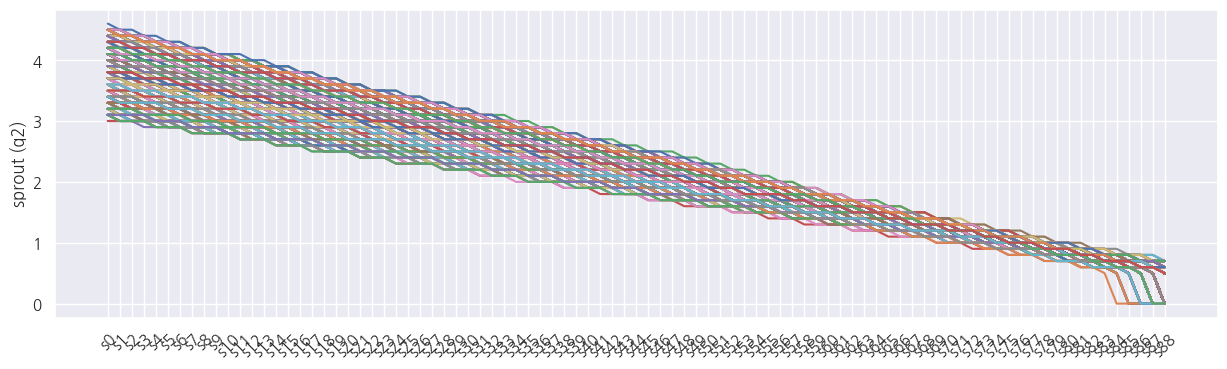

In [42]:
plt.figure(figsize=(15, 4))
for i in q2.index:
    sns.lineplot(data=train[sprout_col].loc[i])
plt.ylabel('sprout (q2)')
plt.xticks(rotation=45)
plt.show()

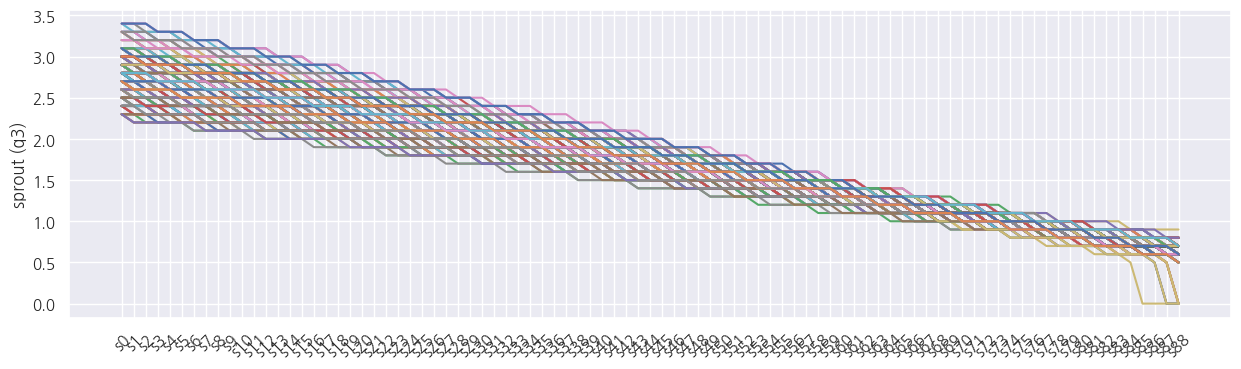

In [43]:
plt.figure(figsize=(15, 4))
for i in q3.index:
    sns.lineplot(data=train[sprout_col].loc[i])
plt.ylabel('sprout (q3)')
plt.xticks(rotation=45)
plt.show()

## 이외 컬럼(other_col: 수고, 수관폭min, 수관폭max, 수관폭avg) 상관분석 결과 target과의 상관성 매우 낮음

In [44]:
train[col_else].head(2)

,착과량(int),수고,수관폭min,수관폭max
ID,,,,
TRAIN_0000,692,275.0,287.0,292.0
TRAIN_0001,534,293.0,284.0,336.0


<AxesSubplot: >

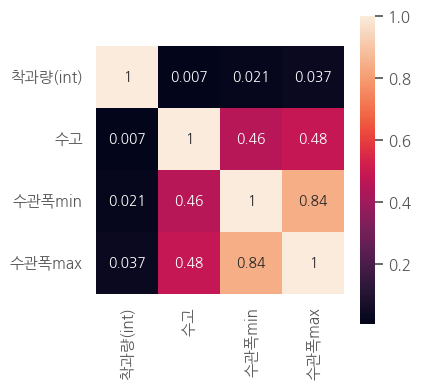

In [45]:
plt.style.use('ggplot')
corrMatt = train[col_else].corr()
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
sns.heatmap(corrMatt, annot=True, square=True)

In [ ]:
"""corrMatt = train.corr()
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrMatt,annot=True, square=True, cmap =sns.diverging_palette(20, 220, n=200))"""

"corrMatt = train.corr()\nplt.rcParams['axes.unicode_minus'] = False\nfig, ax = plt.subplots()\nfig.set_size_inches(12,12)\nsns.heatmap(corrMatt,annot=True, square=True, cmap =sns.diverging_palette(20, 220, n=200))"

# Feature Engineering

### create new features

In [30]:
# 30+31+28

In [49]:
for d in [train, test]:
    chlorophyll=d[chlorophyll_col]
    sprout=d[sprout_col]
    #monthly chlorophyll growth
    d['cg9']=(d['c29']-d['c0'])/d['c0']*100
    d['cg10']=(d['c60']-d['c30'])/d['c30']*100
    d['cg11']=(d['c88']-d['c61'])/d['c61']*100
    #monthly sprout growth
    d['sg9']=(d['s29']-d['s0'])/d['s0']*100
    d['sg10']=(d['s60']-d['s30'])/d['s30']*100
    d['sg11']=(d['s88']-d['s61'])/d['s61']*100
    #monthly mean chlorophyll
    d['cm9']=chlorophyll.iloc[:,0:30].T.sum()/30
    d['cm10']=chlorophyll.iloc[:,30:61].T.sum()/31
    d['cm11']=chlorophyll.iloc[:,61:89].T.sum()/28
    #monthly mean sprout
    d['sm9']=sprout.iloc[:,0:30].T.sum()/30
    d['sm10']=sprout.iloc[:,30:61].T.sum()/31
    d['sm11']=sprout.iloc[:,61:89].T.sum()/28
    #monthly std chlorophyll
    d['cs9']=np.std(chlorophyll.iloc[:,0:30].T)
    d['cs10']=np.std(chlorophyll.iloc[:,30:61].T)
    d['cs11']=np.std(chlorophyll.iloc[:,61:89].T)
    #monthly std sprout
    d['ss9']=np.std(sprout.iloc[:,0:30].T)
    d['ss10']=np.std(sprout.iloc[:,30:61].T)
    d['ss11']=np.std(sprout.iloc[:,61:89].T)
    d['ratio'] = d['수고']/d['수관폭avg']

### finalize features by correlation

In [56]:
corrtrain = train.corr()
highcorr = corrtrain['착과량(int)'][np.abs(corrtrain['착과량(int)'])>0.5]
highcorr

착과량(int)    1.000000
s0         -0.980777
s1         -0.980766
s2         -0.980633
s3         -0.980772
              ...   
sm9        -0.981018
sm10       -0.975303
ss9        -0.975870
ss10       -0.976559
ss11       -0.947931
Name: 착과량(int), Length: 91, dtype: float64

In [68]:
final_features = highcorr.keys()[1:]

# Modeling

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

c:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [66]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [63]:
Y = train['착과량(int)']
X = train[final_features]

In [67]:
estimators=[
    ('linear',LinearRegression()),
    ('elasticnet',SGDRegressor(penalty='elasticnet')),
    ('gb',GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                max_depth=7, min_samples_leaf=15, min_samples_split=10)),
    ('random_forest',RandomForestRegressor()),
    ('xgb',XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                        colsample_bytree=1, max_depth=7)),
    ('lgbm', LGBMRegressor(num_leaves=31, max_depth= 7, subsample= 0.4, colsample_bytree= 0.4, learning_rate=0.05, n_estimators=200)),
    #('svr',SVR()), #Radial Basis Function/ kernel='rbf', C=100, gamma=0.1, epsilon=.1
    ('deep_nn',MLPRegressor(hidden_layer_sizes=(128,64,32,16,8), max_iter=5000, alpha=0.005, random_state=42, activation='identity')),
    ('knn',KNeighborsRegressor(n_neighbors=13,weights='distance',algorithm='auto'))]

### train0: original data / train1: original data + 파생변수 / train2: 파생변수

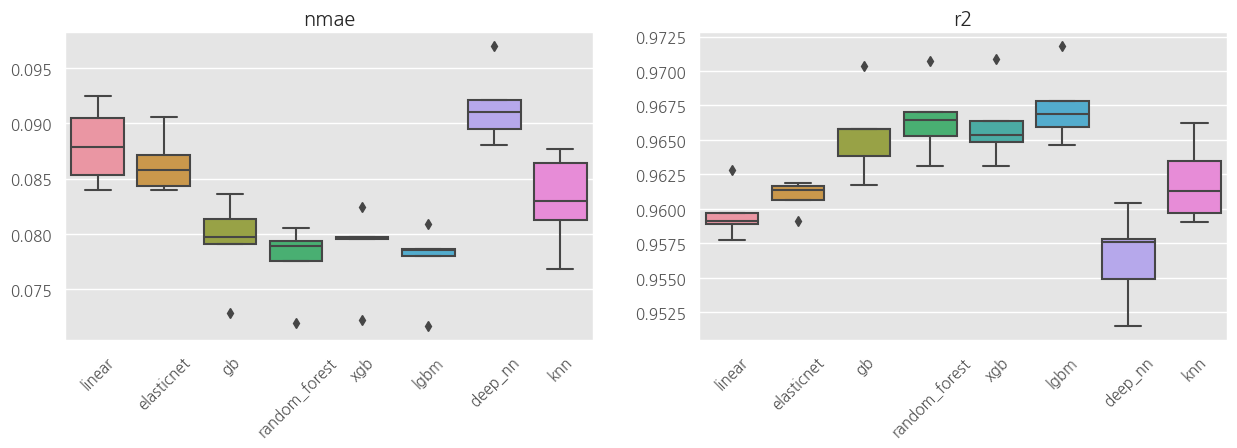

In [72]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1,2, figsize=(15,4))

data, eval_data, target, eval_target = train_test_split(X,Y,test_size=.20)

pipes={}
for model in estimators:
    pipe=Pipeline(steps=[('scaler',StandardScaler()), model])
    pipe.fit(data,target)
    pipes[pipe.steps[1][0]]=pipe

### Initial Model Scoring
_metrics={'nmae':make_scorer(NMAE),'r2':make_scorer(r2_score)} # 'msle':make_scorer(mean_squared_log_error),

estimator_names=[model[0] for model in estimators]

def plot_estimators(estimators=estimator_names,n_splits=5,metrics=['nmae','r2']):
    metrics={key : _metrics[key] for key in metrics}
    scorers=[]
    labels=[]
    for pipe_name in pipes.keys():
        if pipe_name in estimators:
            pipe=pipes[pipe_name]
            labels.append(pipe_name)
            kf=KFold(n_splits)
            model_score=cross_validate(pipe,data,target,scoring=metrics,cv=kf)
            scorers.append(model_score)
    
    score_lists={}
    for metric in metrics:
        score_lists[metric]=[score['test_'+metric] for score in scorers]
    for  i,(title, _list) in enumerate(score_lists.items()):
        sns.boxplot(data=_list, ax=axs[i])
        axs[i].set_xticklabels(labels, rotation=45)
        axs[i].set_title(title)
        
metrics={'nmae':make_scorer(NMAE),'r2':make_scorer(r2_score)}
plot_estimators()

In [74]:
del pipes['linear'], pipes['elasticnet'], pipes['deep_nn'], pipes['knn']

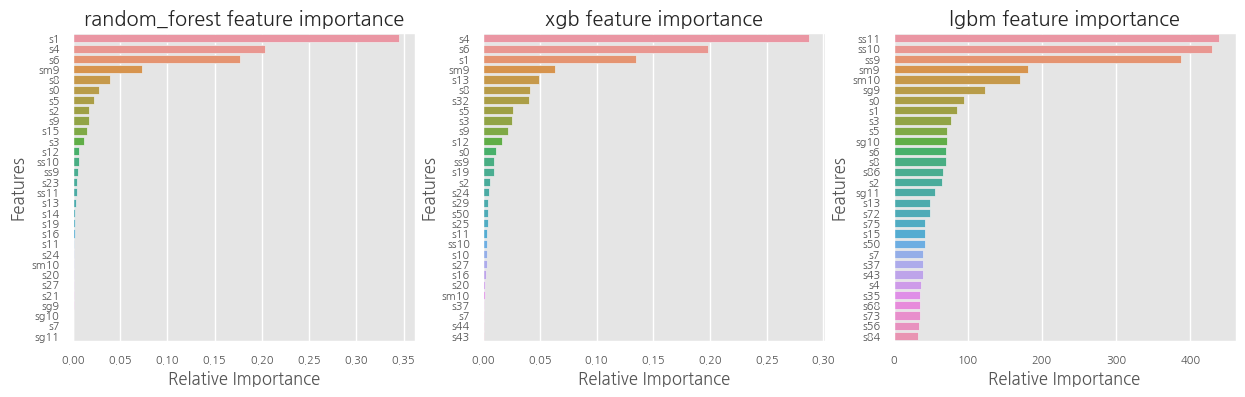

In [73]:
tree_based=['random_forest','xgb', 'lgbm']
fig, axs = plt.subplots(1,3,figsize=(15,4))
col=0
for name in pipes.keys(): 
    if name in tree_based:
        feat_impt=pipes[name].named_steps[name].feature_importances_
        graph_data=pd.DataFrame()

        graph_data['feature']=data.columns.values
        graph_data['importance']=feat_impt
        graph_data_top=graph_data.nlargest(30,'importance')

        g=sns.barplot(y='feature',x='importance',data=graph_data_top,orient='h', ax=axs[col])
        col+=1
        g.set_ylabel('Features',fontsize=12)
        g.set_xlabel('Relative Importance')
        g.set_title(name + " feature importance")
        g.tick_params(labelsize=8)

## Ensemble

In [75]:
from sklearn.ensemble import VotingRegressor
from sklearn.base import clone

estimators=[(pipe.steps[1][0],clone(pipe.steps[1][1])) for pipe in pipes.values()] 
vote=Pipeline(steps=[('scaler',StandardScaler()), ('voter',VotingRegressor(estimators))])
vote.fit(data,target)

Pipeline(steps=[('scaler', StandardScaler()),
                ('voter',
                 VotingRegressor(estimators=[('gb',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=7,
                                                                        min_samples_leaf=15,
                                                                        min_samples_split=10,
                                                                        n_estimators=200)),
                                             ('random_forest',
                                              RandomForestRegressor()),
                                             ('xgb',
                                              XGBRegressor(base_score=0.5,
                                                           booster='gbtree',
                                                           colsample_bylevel=1,
                                                           colsample_bynode=1,
                                                           colsample_byt...
                                                           min_child_weight=1,
                                                           missing=nan,
                                                           monotone_constraints='()',
                                                           n_estimators=100,
                                                           n_jobs=8,
                                                           num_parallel_tree=1,
                                                           predictor='auto',
                                                           random_state=0,
                                                           reg_alpha=0,
                                                           reg_lambda=1,
                                                           scale_pos_weight=1,
                                                           subsample=0.75,
                                                           tree_method='exact',
                                                           validate_parameters=1,
                                                           verbosity=None)),
                                             ('lgbm',
                                              LGBMRegressor(colsample_bytree=0.4,
                                                            learning_rate=0.05,
                                                            max_depth=7,
                                                            n_estimators=200,
                                                            subsample=0.4))]))])

In [76]:
predictions=vote.predict(eval_data)
NMAE(eval_target,predictions)

0.07452538823192961

In [77]:
for name in pipes.keys():
    print(name)
    predictions=pipes[name].predict(eval_data)
    print(NMAE(eval_target,predictions))

gb
0.07515856772969118
random_forest
0.07645293803571598
xgb
0.07579893200182197
lgbm
0.07321601253315975


In [85]:
final_test = test[final_features]

In [98]:
from itertools import combinations

final_estimators=pipes.keys()

combos=[]
for L in range(2, len(final_estimators)+1):
    for subset in combinations(final_estimators, L):
        combos.append(list(subset))

combo_names=[]
nmae=[]
submissions=[]

for combo in combos:
    estimators=[(name,clone(pipes[name].named_steps[name])) for name in combo] 
    vote=Pipeline(steps=[('scaler',StandardScaler()), ('voter',VotingRegressor(estimators))])
    vote.fit(data,target)
    predictions=vote.predict(eval_data)
    nmae.append(NMAE(eval_target,predictions))

    submission = vote.predict(final_test)
    submissions.append(submission)

    file = pd.read_csv('./sample_submission.csv', encoding='UTF-8')
    file['착과량(int)'] = submission
    file.to_csv('./{}.csv'.format(('_').join(list(combo))), index=False, encoding='utf-8-sig')

    combo_names.append(str(list(combo)))
    
score=pd.DataFrame()
score['combo']=combo_names
score['nmae']=nmae
score

,combo,nmae
0,"['gb', 'random_forest']",0.075367
1,"['gb', 'xgb']",0.075040
2,"['gb', 'lgbm']",0.074016
3,"['random_forest', 'xgb']",0.075374
4,"['random_forest', 'lgbm']",0.074429
5,"['xgb', 'lgbm']",0.074111
6,"['gb', 'random_forest', 'xgb']",0.075102
7,"['gb', 'random_forest', 'lgbm']",0.074606
8,"['gb', 'xgb', 'lgbm']",0.074302
9,"['random_forest', 'xgb', 'lgbm']",0.074589


In [102]:
score['nmae'].max()

0.07537375388780439

public점수 0.0739332244	 \
private점수	0.0751424693